In [71]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [72]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,3)

In [73]:
propiedades = pd.read_csv('propiedades-clean.csv')

In [74]:
propiedades['created_on'] = pd.to_datetime(propiedades['created_on'])
propiedades.insert(3, 'year', propiedades['created_on'].dt.year)
propiedades['year'] = propiedades['year'].fillna(0).astype(int)
propiedades.head(15)

,Unnamed: 0,id,created_on,year,operation,property_type,place_name,place_with_parent_names,state_name,geonames_id,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,2012,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Bs.As. G.B.A. Zona Oeste,3429244.0,...,120000.0,333.0,93.0,360.360360,1290.322581,NaN,NaN,NaN,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA
1,1,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,2012,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Bs.As. G.B.A. Zona Oeste,3429244.0,...,220000.0,220.0,220.0,1000.000000,1000.000000,NaN,NaN,NaN,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA
2,2,9446052c949050359fb08b9f1ba83ba2eaa20c99,2012-12-08,2012,sell,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,...,185000.0,300.0,103.0,616.666667,1796.116505,NaN,5.0,NaN,Casa Multifamiliar en Mataderos!!! Sobre lote ...,CASA EN VENTA
3,3,4d3b492ed5f9c74cdf33b56b98328e5c950e3f9c,2013-01-04,2013,sell,apartment,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Bs.As. G.B.A. Zona Norte,3429979.0,...,97000.0,54.0,54.0,1796.296296,1796.296296,NaN,2.0,NaN,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Arcos de Pilar
4,4,535441f569473f6e5d687c38b27d9b9c6e69e284,2013-01-09,2013,sell,store,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|,Bs.As. G.B.A. Zona Norte,3428983.0,...,750000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,"Venta - Local - Argentina, Buenos Aires, Zona ...",Local en Venta ubicado en San Isidro
5,5,61f3789618edabeaa7b5fc06ff36112f8a06557f,2013-01-26,2013,sell,apartment,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Bs.As. G.B.A. Zona Norte,3429979.0,...,100000.0,45.0,45.0,2222.222222,2222.222222,NaN,2.0,NaN,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Pilar
6,6,e842ed22eac89b9bffff146377abfd5bceb0b0cd,2013-02-08,2013,sell,house,Benavidez,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Bena...,Bs.As. G.B.A. Zona Norte,3436048.0,...,390000.0,NaN,375.0,NaN,1040.000000,NaN,6.0,NaN,"Venta - Casa - Argentina, Buenos Aires, Zona N...",Casa en Venta ubicado en Benavidez
7,7,4dcfa9a54bdd18cd5438221c6dcfa94738c11c40,2013-02-15,2013,sell,apartment,Florida,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,3433908.0,...,275000.0,111.0,111.0,2477.477477,2477.477477,NaN,4.0,NaN,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Florida
8,8,c60df01c06fe62d91c4767830ee14890fa4d73ec,2013-03-23,2013,sell,house,Haedo,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Haedo|,Bs.As. G.B.A. Zona Oeste,NaN,...,NaN,301.0,276.0,NaN,NaN,NaN,NaN,NaN,VENTA CASA 5 AMBIENTES EN HAEDO.Chalet sobre l...,CASA EN VENTA
9,9,0f0e301809a14b8c069b267fa1c56a3b5ec35d9e,2013-03-23,2013,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Bs.As. G.B.A. Zona Oeste,3429617.0,...,88000.0,60.0,60.0,1466.666667,1466.666667,1.0,2.0,200.0,VENTA DEPARTAMENTO 2 AMBIENTES EN RAMOS MEJÍA....,DEPARTAMENTO EN VENTA


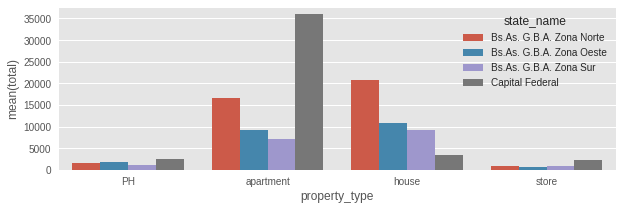

In [75]:
import seaborn as sns
x = propiedades.groupby(['state_name','property_type']).size().to_frame('total').reset_index()
sns.barplot(x='property_type', y='total', hue='state_name', data=x)


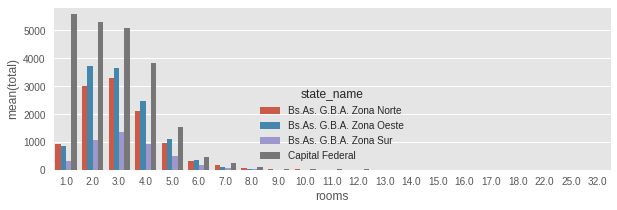

In [76]:
x = propiedades.groupby(['state_name','rooms']).size().to_frame('total').reset_index()
sns.barplot(x='rooms', y='total', hue='state_name', data=x)

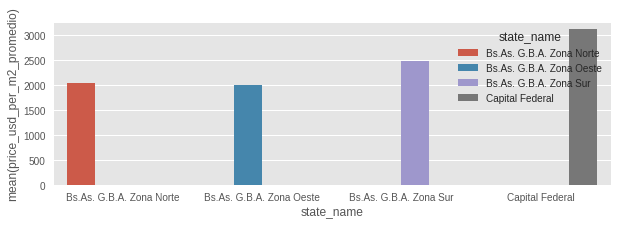

In [77]:
x = propiedades[['state_name','price_usd_per_m2']].groupby(['state_name']).mean()
x = x['price_usd_per_m2'].to_frame('price_usd_per_m2_promedio').reset_index()

orden = x['price_usd_per_m2_promedio'].sort_values()
print(orden)

sns.barplot(x='state_name', y='price_usd_per_m2_promedio', hue='state_name', data=x)

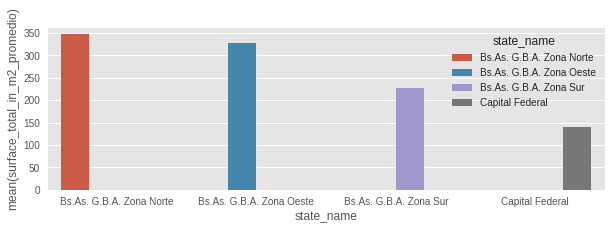

In [51]:
variable = 'surface_total_in_m2'
enGrafico = 'surface_total_in_m2_promedio'
x = propiedades[['state_name',variable]].groupby(['state_name']).mean()
x = x[variable].to_frame(enGrafico).reset_index()

orden = x[enGrafico].sort_values()
print(orden)

sns.barplot(x='state_name', y=enGrafico, hue='state_name', data=x)

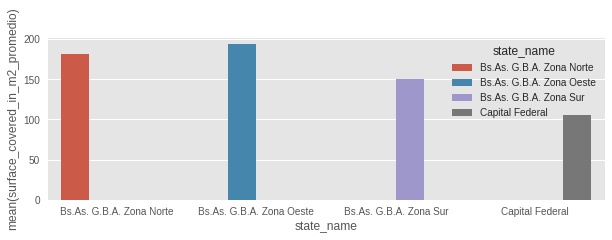

In [78]:
variable = 'surface_covered_in_m2'
enGrafico = 'surface_covered_in_m2_promedio'
x = propiedades[['state_name',variable]].groupby(['state_name']).mean()
x = x[variable].to_frame(enGrafico).reset_index()

orden = x[enGrafico].sort_values()
print(orden)

plt.rcParams['figure.figsize'] = (10, 3)
sns.barplot(x='state_name', y=enGrafico, hue='state_name', data=x)

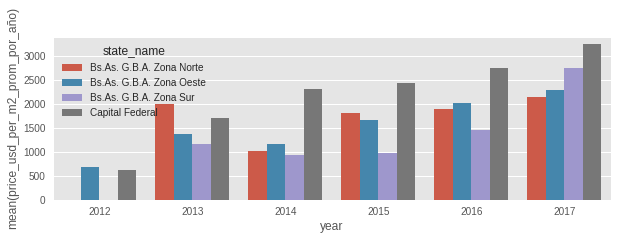

In [79]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

variable = 'price_usd_per_m2'
enGrafico = 'price_usd_per_m2_prom_por_año'
x = propiedades[['state_name','year',variable]].groupby(['state_name','year']).mean()
x = x[variable].to_frame(enGrafico).reset_index()

orden = x[enGrafico].sort_values()
x
sns.barplot(x='year', y=enGrafico, hue='state_name', data=x)

Divido propiedades por zonas

In [80]:
sur = propiedades.loc[propiedades['state_name'] == 'Bs.As. G.B.A. Zona Sur']
norte = propiedades.loc[propiedades['state_name'] == 'Bs.As. G.B.A. Zona Norte']
oeste = propiedades.loc[propiedades['state_name'] == 'Bs.As. G.B.A. Zona Oeste']
capi = propiedades.loc[propiedades['state_name'] == 'Capital Federal']

In [81]:
#Filtro nombres que no especifican barrio
capi = capi.loc[capi['place_name'] != 'Capital Federal']
sur = sur.loc[sur['place_name'] != 'Bs.As. G.B.A. Zona Sur']
norte = norte.loc[norte['place_name'] != 'Bs.As. G.B.A. Zona Norte']
oeste = oeste.loc[oeste['place_name'] != 'Bs.As. G.B.A. Zona Oeste']

In [82]:
#Filtro precios sin sentido
sur = sur.loc[sur['price_usd_per_m2'] < 15000]
norte = norte.loc[norte['price_usd_per_m2'] < 15000]
oeste = oeste.loc[oeste['price_usd_per_m2'] < 15000]

Zona Sur

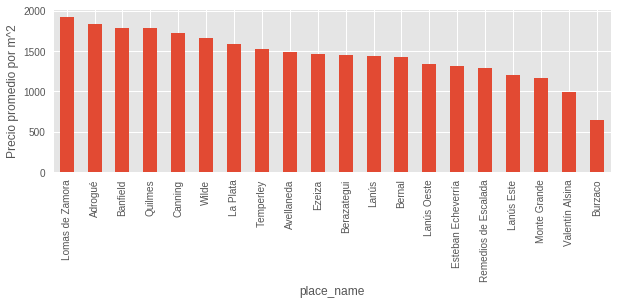

In [83]:
#Calculo precios por barrio filtrando barrios con pocas publicaciones

surprecios = sur.groupby('place_name').filter(lambda x: len(x) > 100)
surprecios = surprecios.groupby('place_name').\
    mean().loc[:,'price_usd_per_m2'].sort_values(ascending = False)
    
plt.ylabel('Precio promedio por m^2')
surprecios.plot(kind = 'bar',figsize = (10,3))

In [15]:
surprecios

place_name
Lomas de Zamora         1925.012652
Adrogué                 1836.008860
Banfield                1792.790424
Quilmes                 1787.985779
Canning                 1730.940398
Wilde                   1660.722636
La Plata                1583.661335
Temperley               1522.733938
Avellaneda              1491.564087
Ezeiza                  1462.133133
Berazategui             1447.108323
Lanús                   1436.422391
Bernal                  1425.218875
Lanús Oeste             1341.634832
Esteban Echeverría      1314.896538
Remedios de Escalada    1296.512431
Lanús Este              1210.312246
Monte Grande            1161.654343
Valentín Alsina          993.413494
Burzaco                  652.180599
Name: price_usd_per_m2, dtype: float64

Zona Norte

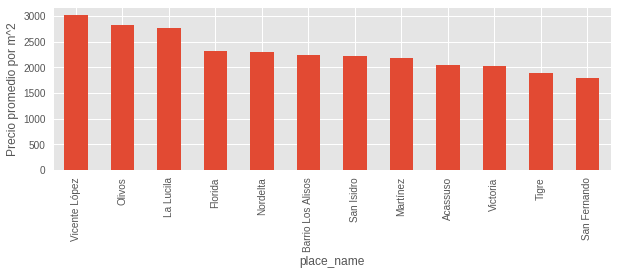

In [84]:
#Calculo precios por barrio filtrando barrios con pocas publicaciones

norteprecios = norte.groupby('place_name').filter(lambda x: len(x) > 200)
norteprecios = norteprecios.groupby('place_name').\
    mean().loc[:,'price_usd_per_m2'].sort_values(ascending = False)

plt.ylabel('Precio promedio por m^2')
#Plot de los 12 mayores
norteprecios[:12].plot(kind = 'bar',figsize = (10,3))

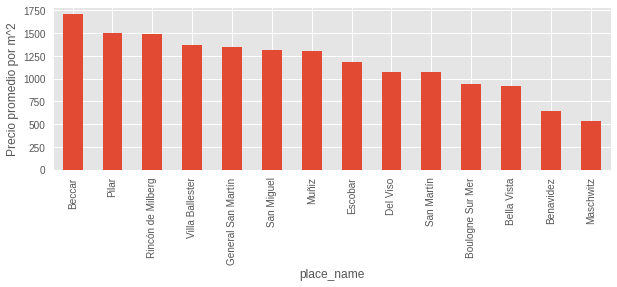

In [85]:
#Plot de los menores
plt.ylabel('Precio promedio por m^2')
norteprecios[12:].plot(kind = 'bar', figsize = (10,3))

In [19]:
norteprecios

place_name
Vicente López                   3028.678115
Olivos                          2830.014615
La Lucila                       2777.009355
Santa Barbara Barrio Cerrado    2448.243626
Florida                         2319.836297
Nordelta                        2297.263176
Barrio Los Alisos               2248.262634
San Isidro                      2225.596281
Martínez                        2185.948190
Acassuso                        2039.966568
Victoria                        2025.353767
Tigre                           1891.222324
San Fernando                    1804.723170
Beccar                          1706.873669
Munro                           1650.086528
Delta                           1569.493864
Pilar                           1499.345732
Rincón de Milberg               1492.053380
Villa Rosa                      1431.594810
Carapachay                      1389.598244
Villa Ballester                 1366.515158
General San Martín              1351.401210
San Miguel           

Zona Oeste

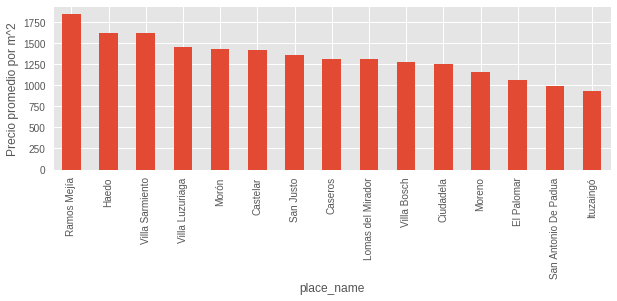

In [86]:
#Calculo precios por barrio filtrando barrios con pocas publicaciones
oesteprecios = oeste.groupby('place_name').filter(lambda x: len(x) > 200)
oesteprecios = oesteprecios.groupby('place_name').\
    mean().loc[:,'price_usd_per_m2'].sort_values(ascending = False)
    
plt.ylabel('Precio promedio por m^2')
#Plot 
oesteprecios.plot(kind = 'bar',figsize = (10,3))

In [31]:
oesteprecios

place_name
Ramos Mejía                 1842.638995
Sáenz Peña                  1665.698660
Haedo                       1619.839932
Villa Sarmiento             1616.696990
Villa Luzuriaga             1456.693078
Morón                       1432.666424
Santos Lugares              1429.460228
Castelar                    1413.894938
La Matanza                  1390.925369
San Justo                   1357.250575
Caseros                     1312.303332
Lomas del Mirador           1310.202157
Villa Bosch                 1278.511086
Ciudadela                   1251.846675
Tres de Febrero             1183.330807
Moreno                      1152.944885
El Palomar                  1068.242052
San Antonio De Padua         986.898548
Isidro Casanova              965.072557
Ituzaingó                    929.155903
Merlo                        850.827200
Hurlingham                   794.476603
General Rodríguez            794.223307
Bs.As. G.B.A. Zona Oeste     625.861352
Parque Leloir                

Calculo de superficie no cubierta de las propiedades

In [87]:
sur['dif_sup'] = sur['surface_total_in_m2'] - sur['surface_covered_in_m2']
norte['dif_sup'] = norte['surface_total_in_m2'] - norte['surface_covered_in_m2']
oeste['dif_sup'] = oeste['surface_total_in_m2'] - oeste['surface_covered_in_m2']
capi['dif_sup'] = capi['surface_total_in_m2'] - capi['surface_covered_in_m2']

In [88]:
def borrarnegativos(row):
    if row['dif_sup'] < 0:
        return 0
    return row['dif_sup']
    

In [89]:
capi['dif_sup'] = capi.apply(lambda row: borrarnegativos(row), axis=1)
norte['dif_sup'] = norte.apply(lambda row: borrarnegativos(row), axis=1)
oeste['dif_sup'] = oeste.apply(lambda row: borrarnegativos(row), axis=1)
sur['dif_sup'] = sur.apply(lambda row: borrarnegativos(row), axis=1)


Zona Sur

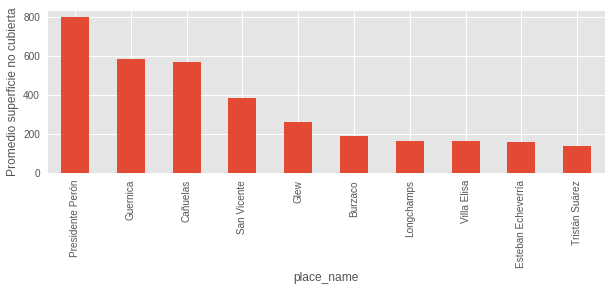

In [90]:
#Claculo por barrio el promedio de superficie no cubierta
patiosur = sur.groupby('place_name').filter(lambda x: len(x) > 30)
patiosur = patiosur.groupby('place_name').\
    mean().loc[:,'dif_sup'].sort_values(ascending = False)
    
plt.xlabel('Barrio')
plt.ylabel('Promedio superficie no cubierta')
#Ploteo los 10 mayores
patiosur[:10].plot(kind = 'bar',figsize = (10,3)) 


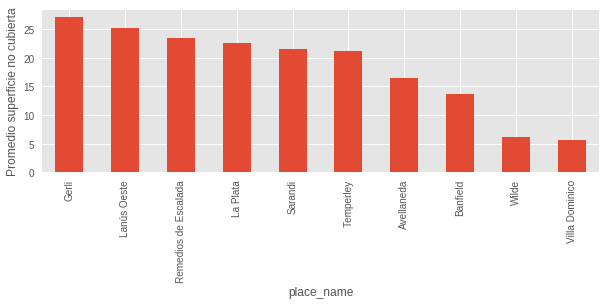

In [92]:
#Ploteo los 10 menores

plt.ylabel('Promedio superficie no cubierta')
patiosur[-10:].plot(kind = 'bar',figsize = (10,3)) 


In [ ]:
#

In [96]:
patiosur

place_name
Presidente Perón         809.311475
Guernica                 584.894737
Cañuelas                 528.022222
Ranelagh                 475.037037
Ingeniero Juan Allan     466.545455
San Vicente              414.387097
Glew                     258.375000
Solar del Bosque         199.083333
Burzaco                  187.093596
Ezeiza                   184.252427
Luis Guillón             178.500000
Villa Elisa              177.420000
Fincas de Iraola II      170.000000
Esteban Echeverría       168.994286
Monte Grande             163.360000
Longchamps               158.169492
Manuel B Gonnet          131.405172
Canning                  128.310231
Berazategui              122.018450
City Bell                119.934307
Tristán Suárez           110.057143
Rafael Calzada            97.200000
Lanús Este                84.067568
Country Nuevo Quilmes     83.235294
Tolosa                    82.800000
Lomas de Zamora           80.381316
Ezpeleta                  70.468750
Fincas de Iraola 

In [103]:
promediopatiosur = sur.groupby('place_name').filter(lambda x: len(x) > 30)

In [104]:
promediopatiosur['dif_sup'].mean()

65.02643419572553

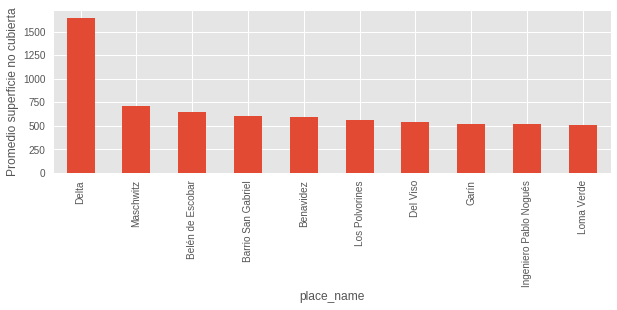

In [94]:
#Claculo por barrio el promedio de superficie no cubierta
pationorte = norte.groupby('place_name').filter(lambda x: len(x) > 30)
pationorte = pationorte.groupby('place_name').\
    mean().loc[:,'dif_sup'].sort_values(ascending = False)
    
plt.xlabel('Barrio')
plt.ylabel('Promedio superficie no cubierta')
#Ploteo los 10 mayores
pationorte[:10].plot(kind = 'bar',figsize = (10,3)) 


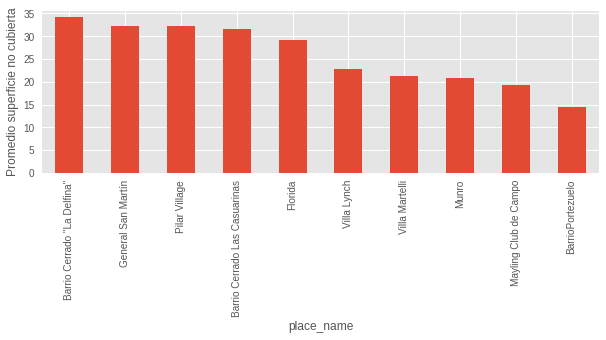

In [95]:
#Ploteo los 10 menores
plt.ylabel('Promedio superficie no cubierta')
pationorte[-10:].plot(kind = 'bar',figsize = (10,3)) 


In [96]:
promediopationorte = norte.groupby('place_name').filter(lambda x: len(x) > 30)

In [97]:
promediopationorte['dif_sup'].mean()

153.7340654094056

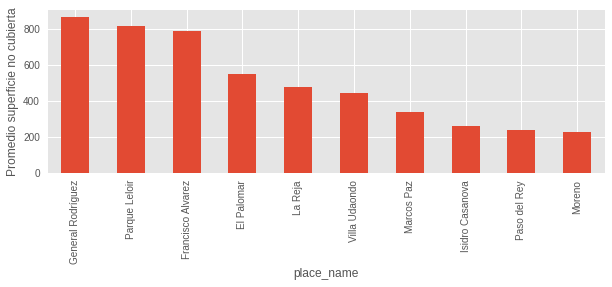

In [99]:
#Claculo por barrio el promedio de superficie no cubierta
patiooeste = oeste.groupby('place_name').filter(lambda x: len(x) > 30)
patiooeste = patiooeste.groupby('place_name').\
    mean().loc[:,'dif_sup'].sort_values(ascending = False)
    
plt.xlabel('Barrio')
plt.ylabel('Promedio superficie no cubierta')
#Ploteo los 10 mayores
patiooeste[:10].plot(kind = 'bar',figsize = (10,3)) 


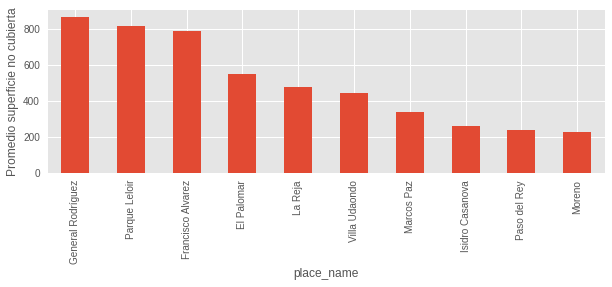

In [100]:

plt.ylabel('Promedio superficie no cubierta')
#Ploteo los 10 menores
patiooeste[:10].plot(kind = 'bar',figsize = (10,3)) 


In [101]:
promediopatiooeste = oeste.groupby('place_name').filter(lambda x: len(x) > 30)

In [102]:
promediopatiooeste['dif_sup'].mean()

99.64276247975262

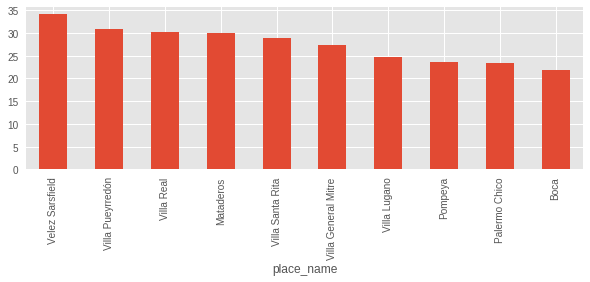

In [105]:
#Claculo por barrio el promedio de superficie no cubierta

patiocapi = capi.groupby('place_name').filter(lambda x: len(x) > 30)
patiocapi = patiocapi.groupby('place_name').\
    mean().loc[:,'dif_sup'].sort_values(ascending = False)
#ploteo los 10 mayores
patiocapi[:10].plot(kind = 'bar',figsize=(10, 3)) 


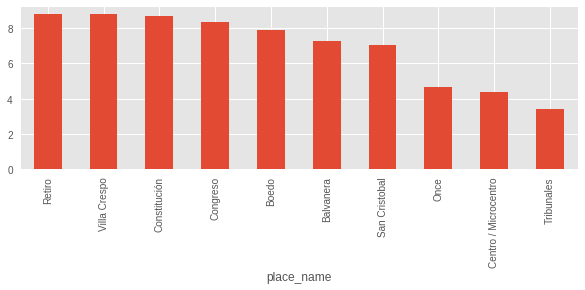

In [106]:
#ploteo los 10 menores
patiocapi[-10:].plot(kind = 'bar',figsize=(10, 3)) 


In [107]:
promediopatiocapi = capi.groupby('place_name').filter(lambda x: len(x) > 30)

In [108]:
promediopatiocapi['dif_sup'].mean()

12.323818019625335

In [109]:
capi['rooms'].mean()

2.7489460084319326